In [12]:
# import libraries 

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [13]:
# read dataset 
shirt_df = pd.read_csv('Tshirt.csv')


In [14]:
# View the head rows 
shirt_df.head()

,Height,Weight,Size
0,157,62,S
1,162,58,S
2,155,59,S
3,159,58,S
4,157,52,S


In [15]:
# View the last rows
shirt_df.tail()

,Height,Weight,Size
31,169,64,L
32,170,62,L
33,170,63,L
34,167,61,L
35,170,68,L


In [16]:
shirt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  36 non-null     int64 
 1   Weight  36 non-null     int64 
 2   Size    36 non-null     object
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [17]:
# Describe does not show details for Object
shirt_df.describe()

,Height,Weight
count,36.000000,36.000000
mean,163.333333,61.583333
std,4.282856,3.434073
min,154.000000,52.000000
25%,160.750000,59.000000
50%,163.000000,62.000000
75%,167.000000,64.000000
max,170.000000,70.000000


In [18]:
shirt_df['Size'].value_counts()

L    19
S    17
Name: Size, dtype: int64

<AxesSubplot:xlabel='Height', ylabel='Weight'>

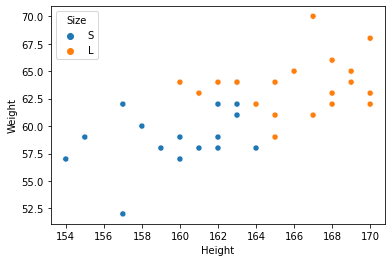

In [19]:
sns.scatterplot( x = 'Height', y = 'Weight', hue = 'Size', data = shirt_df)

In [20]:
# Drop the Species (target label) coloumn
X = shirt_df.drop(['Size'],axis=1)

X.head()

,Height,Weight
0,157,62
1,162,58
2,155,59
3,159,58
4,157,52


In [21]:
y = shirt_df['Size']
y.head()

0    S
1    S
2    S
3    S
4    S
Name: Size, dtype: object

In [22]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [23]:
X_train.head()

,Height,Weight
35,170,68
33,170,63
28,168,63
32,170,62
8,160,57


In [24]:
y_train.head()

35    L
33    L
28    L
32    L
8     S
Name: Size, dtype: object

In [25]:
X_train.shape

(25, 2)

In [26]:
y_train.shape

(25,)

In [27]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  


In [40]:
## bringing train and test data to the standard scale
#scaler.fit(X_train)  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  


In [41]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [43]:
X_test

array([[ 1.42671386,  0.68403245],
       [-0.51439343,  0.41683227],
       [ 0.2135218 , -0.9191686 ],
       [ 1.42671386,  0.95123262],
       [ 0.45616021, -0.11756808],
       [-0.02911661, -0.11756808],
       [-1.24230867, -0.38476825],
       [-1.9702239 , -0.65196843],
       [-0.27175502,  0.1496321 ],
       [ 1.18407545,  1.2184328 ],
       [ 1.18407545,  0.1496321 ]])

In [42]:
# Predict the values of classified for Test data
y_predict = classifier.predict(X_test)
y_predict


array(['L', 'L', 'S', 'L', 'L', 'S', 'S', 'S', 'L', 'L', 'L'],
      dtype=object)

In [31]:
# show result 
# PK: This step need NOT be done once you get familiar. Only for initially to demonstrate

result = {"Actual": y_test, "Predicted": y_predict}
y_pred_df  = pd.DataFrame(result)

In [32]:
y_pred_df

,Actual,Predicted
31,L,L
20,L,L
16,S,S
30,L,L
22,L,L
15,S,S
10,S,S
2,S,S
11,S,L
29,L,L


In [33]:
# PK: This is not needed. Only for showing in training at initial stages

#Display total counts
print ("Actual")
print (y_test.value_counts())

print("===========================")
print(" ")
print("Predicted")
print(pd.Series(y_predict).value_counts())

Actual
L    6
S    5
Name: Size, dtype: int64
 
Predicted
L    7
S    4
dtype: int64


In [34]:
metrics.accuracy_score(y_test, y_predict)

0.9090909090909091

In [35]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Bad credit", "Good Credit"] ,
    yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [36]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 31 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Actual     11 non-null     object
 1   Predicted  11 non-null     object
dtypes: object(2)
memory usage: 264.0+ bytes


In [37]:

print( metrics.classification_report(  y_pred_df.Actual, y_pred_df.Predicted ))

              precision    recall  f1-score   support

           L       0.86      1.00      0.92         6
           S       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11

